In [18]:
import pandas as pd

filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
filmes.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

#"peso" de cada gênero nos filmes
#por exemplo, toy story é mais Animação do que Comédia
#O cálculo basicamente envolve a média e o desvio padrão dos gêneros, portanto, nesse caso, não é realmente aplicável

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [22]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

# Clusterização é a tarefa de dividir os pontos de dados em vários grupos, de modo que os pontos de dados nos mesmos grupos sejam mais semelhantes
# Em palavras simples, o objetivo é segregar grupos com traços semelhantes e atribuí-los a clusters.

Grupos [1 1 2 ... 2 1 2]


In [23]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.38784675 -0.24697458 -0.2181438  -0.26395167 -0.22506343
   2.58203502 -0.1977703   0.18022091 -0.24045863  0.66245806 -0.17053813
  -0.05707513 -0.15691184  0.34873204 -0.25233194 -0.25002756  0.72146118
  -0.15982454 -0.06265926]
 [-0.05917995  0.21693169  1.16903123  1.81773024  1.97602295  0.11865414
  -0.34063591 -0.19680467 -0.59789764  1.2033593  -0.09492563 -0.24829303
   0.59254283  0.28844515 -0.12218812 -0.27318823  0.2282261  -0.4044258
  -0.17103671 -0.08573499]
 [ 0.01918502 -0.09869096 -0.14397124 -0.25139111 -0.26883318  0.01857945
  -0.37463158  0.0639606   0.06468712 -0.15048393 -0.09492563  0.06758735
  -0.08427771 -0.01959505 -0.0385449   0.08510105  0.0053865  -0.05574996
  

In [24]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.387847,-0.246975,-0.218144,-0.263952,-0.225063,2.582035,-0.197770,0.180221,-0.240459,0.662458,-0.170538,-0.057075,-0.156912,0.348732,-0.252332,-0.250028,0.721461,-0.159825,-0.062659
1,-0.059180,0.216932,1.169031,1.817730,1.976023,0.118654,-0.340636,-0.196805,-0.597898,1.203359,-0.094926,-0.248293,0.592543,0.288445,-0.122188,-0.273188,0.228226,-0.404426,-0.171037,-0.085735
2,0.019185,-0.098691,-0.143971,-0.251391,-0.268833,0.018579,-0.374632,0.063961,0.064687,-0.150484,-0.094926,0.067587,-0.084278,-0.019595,-0.038545,0.085101,0.005386,-0.055750,0.053586,0.023964


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf3980fc18>,
      dtype=object)

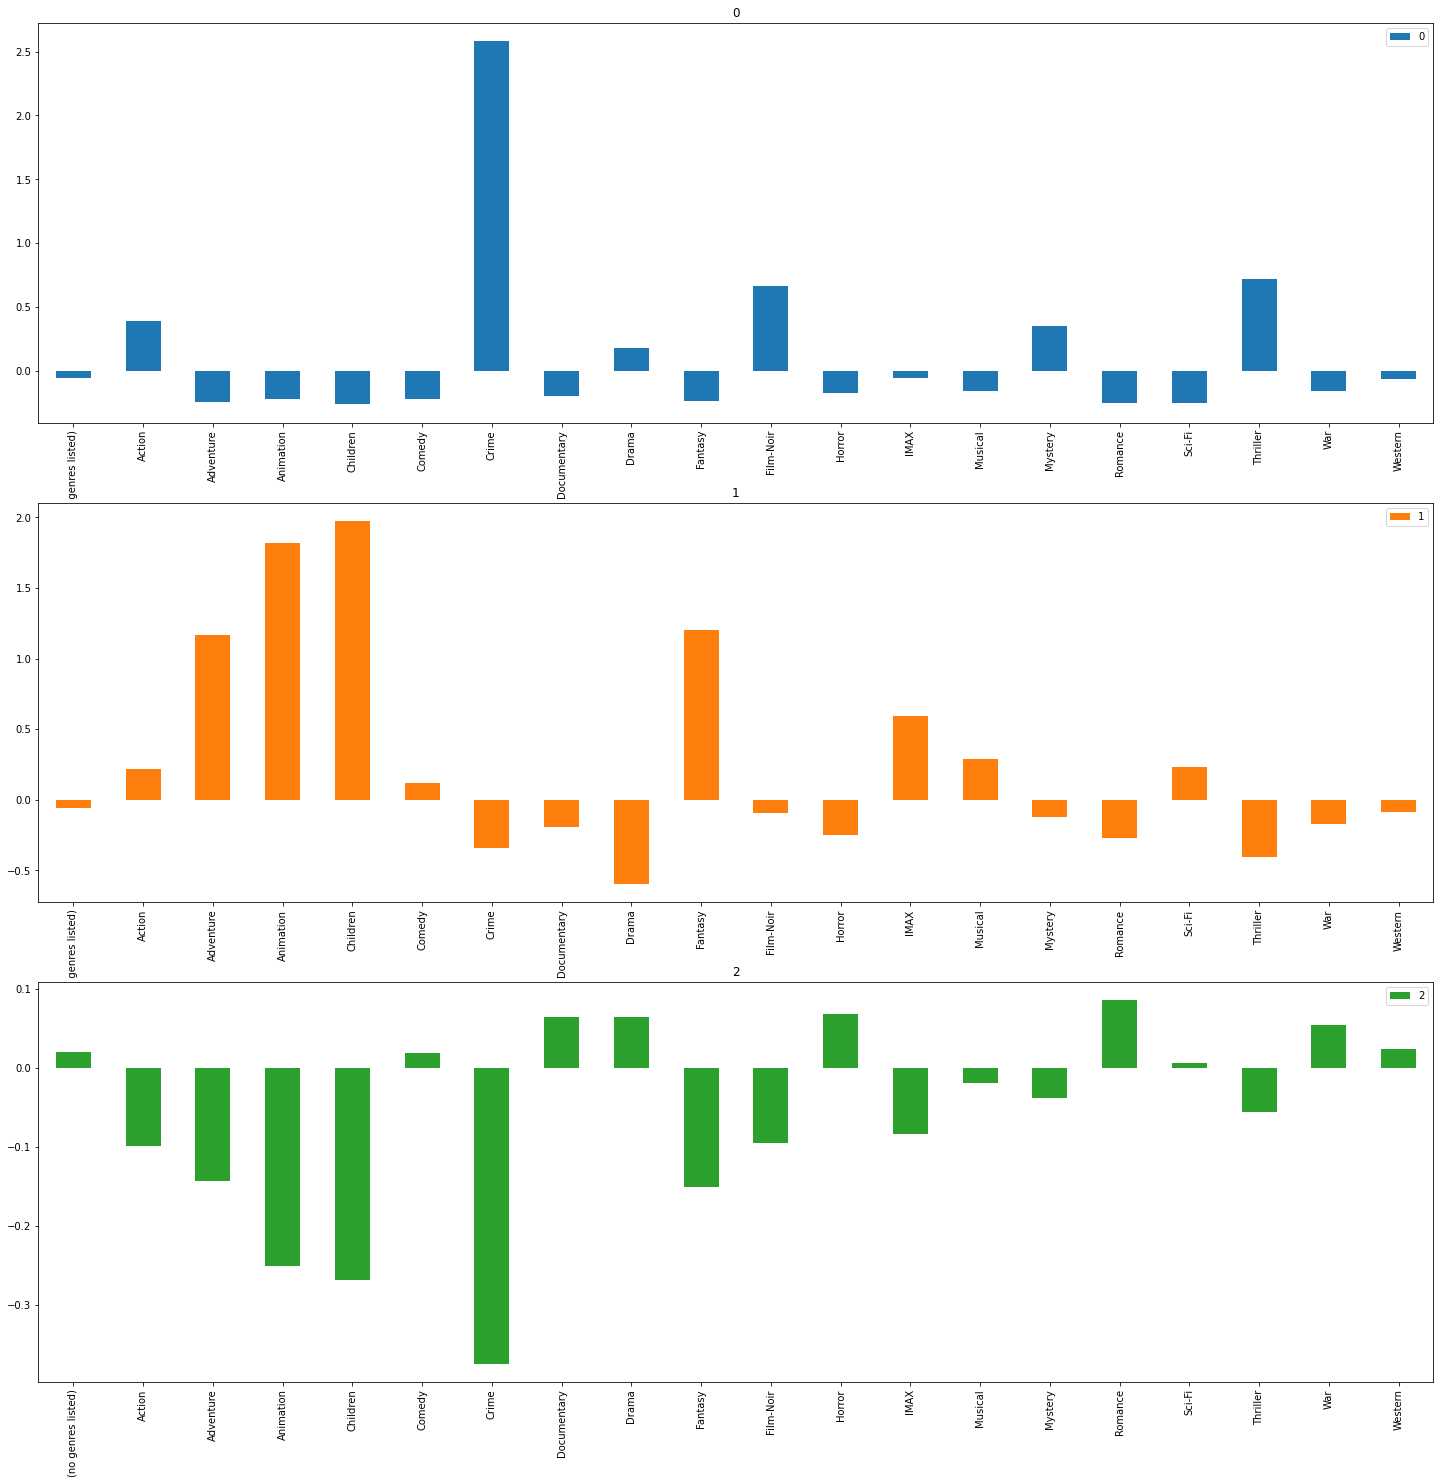

In [25]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

# transpose -> transposição de matriz
# o que é linha vira coluna e vice-versa

In [26]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

#verificar se agrupamento faz sentido

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7092,70301,Obsessed (2009),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
8849,132618,Kite (2014),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3217,4344,Swordfish (2001),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8450,112171,"Equalizer, The (2014)",Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2957,3965,"Strange Love of Martha Ivers, The (1946)",Drama|Film-Noir,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6795,60647,Transsiberian (2008),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1477,2002,Lethal Weapon 3 (1992),Action|Comedy|Crime|Drama,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2826,3783,Croupier (1998),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7489,82667,I Saw the Devil (Akmareul boatda) (2010),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  9.821    , -68.9615   ],
       [-53.66924  ,  15.637468 ],
       [ 18.604904 ,  15.305672 ],
       ...,
       [ -7.4430113, -11.97543  ],
       [ 35.713966 , -40.72678  ],
       [ -7.7901335,  23.662766 ]], dtype=float32)

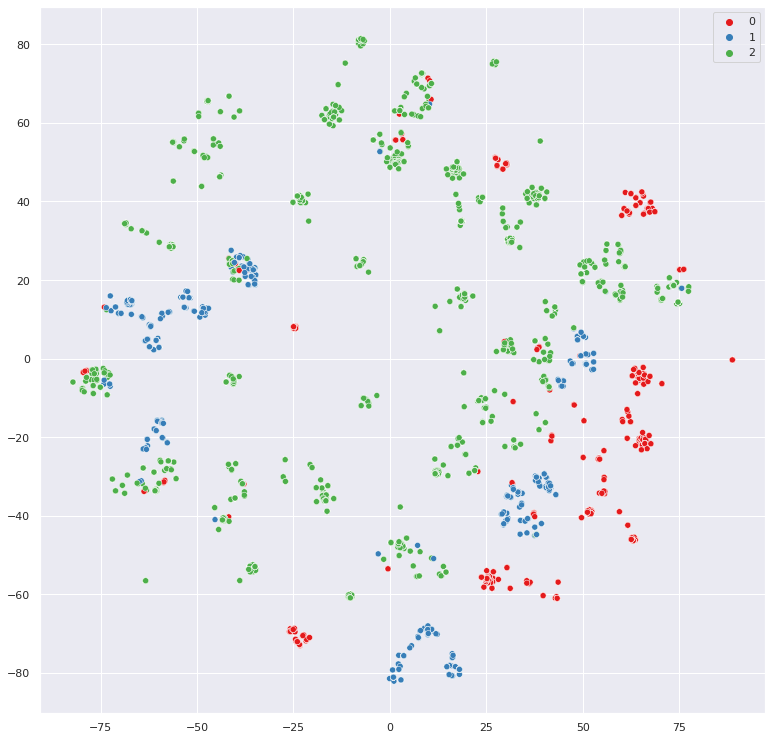

In [29]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf39557400>,
      dtype=object)

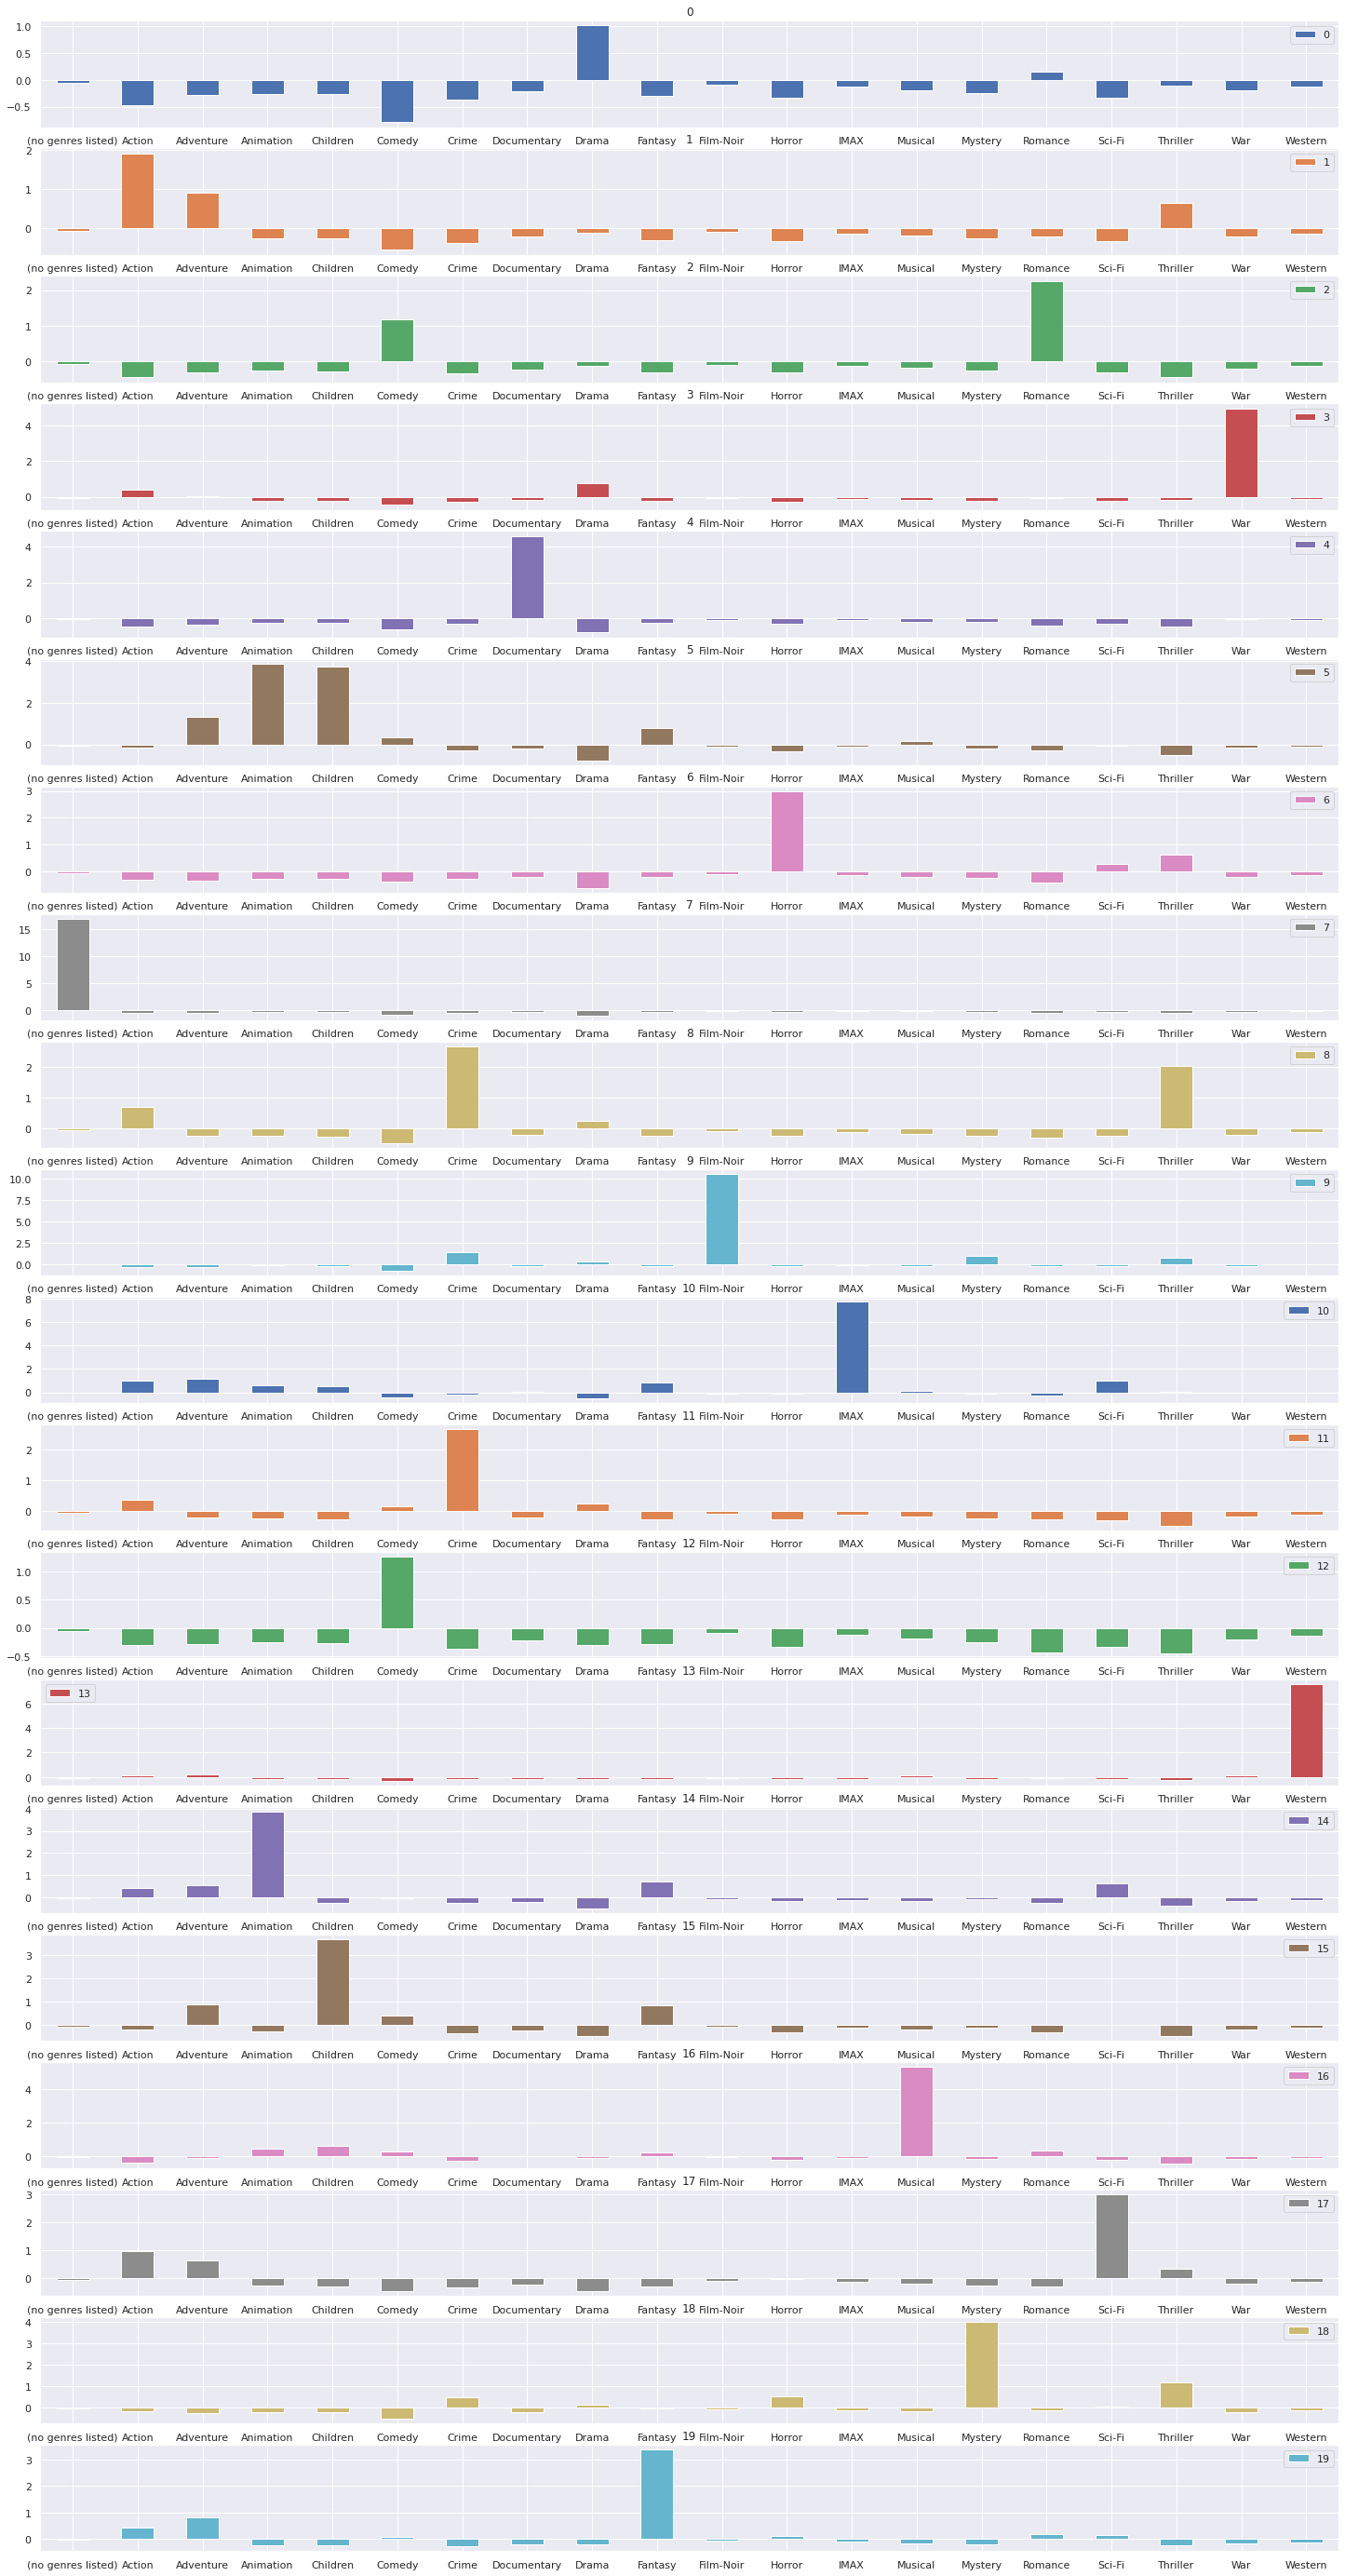

In [30]:
#Agrupando em 20 grupos

modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [31]:
#Quantos grupos escolher

def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [32]:
kmeans(20, generos_escalados)

[20, 55902.643725729016]

In [33]:
kmeans(3, generos_escalados)

[3, 166086.71948950578]

In [34]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 180446.23447855827],
 [3, 167846.8162188226],
 [4, 157283.7063644496],
 [5, 147354.50519674056],
 [6, 138339.23897620212],
 [7, 128342.22217632155],
 [8, 119883.9248994614],
 [9, 111827.63101951059],
 [10, 103581.06182778206],
 [11, 95989.53270006948],
 [12, 85382.40665448841],
 [13, 79169.44529847977],
 [14, 75194.7004570646],
 [15, 68996.52222948664],
 [16, 63678.58626934441],
 [17, 62301.2858081515],
 [18, 59660.58591681662],
 [19, 56796.312773567755],
 [20, 55501.629870179204],
 [21, 53132.17638158417],
 [22, 52194.957654342106],
 [23, 49678.828208444225],
 [24, 49112.90967204879],
 [25, 47795.588812018774],
 [26, 46546.7764119404],
 [27, 46337.9537327895],
 [28, 44202.10677666788],
 [29, 43287.14664787692],
 [30, 43345.92735617986],
 [31, 42095.461666397365],
 [32, 40973.37309486498],
 [33, 39831.32386484043],
 [34, 39874.539038291594],
 [35, 38521.98318663861],
 [36, 36884.337209798825],
 [37, 37197.56852617858],
 [38, 36232.140293366865],
 [39, 35559.3765215

In [35]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,180446.234479
2,3,167846.816219
3,4,157283.706364
4,5,147354.505197
5,6,138339.238976
6,7,128342.222176
7,8,119883.924899
8,9,111827.631020
9,10,103581.061828


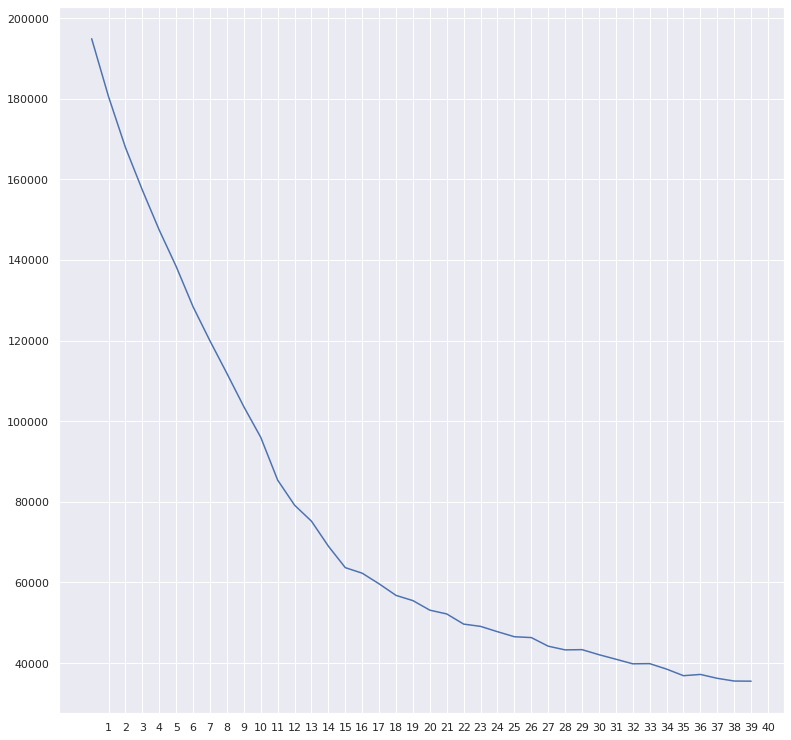

In [36]:
resultado.inertia.plot(xticks=resultado.grupos)

#elbow method

#O elbow method diz que o número de clusters que devemos escolher, e que irá otimizar o número de grupos, 
#é justamente o ponto dessa quebra (ou "elbow point") - que, no nosso caso é 17.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf375c7400>,
      dtype=object)

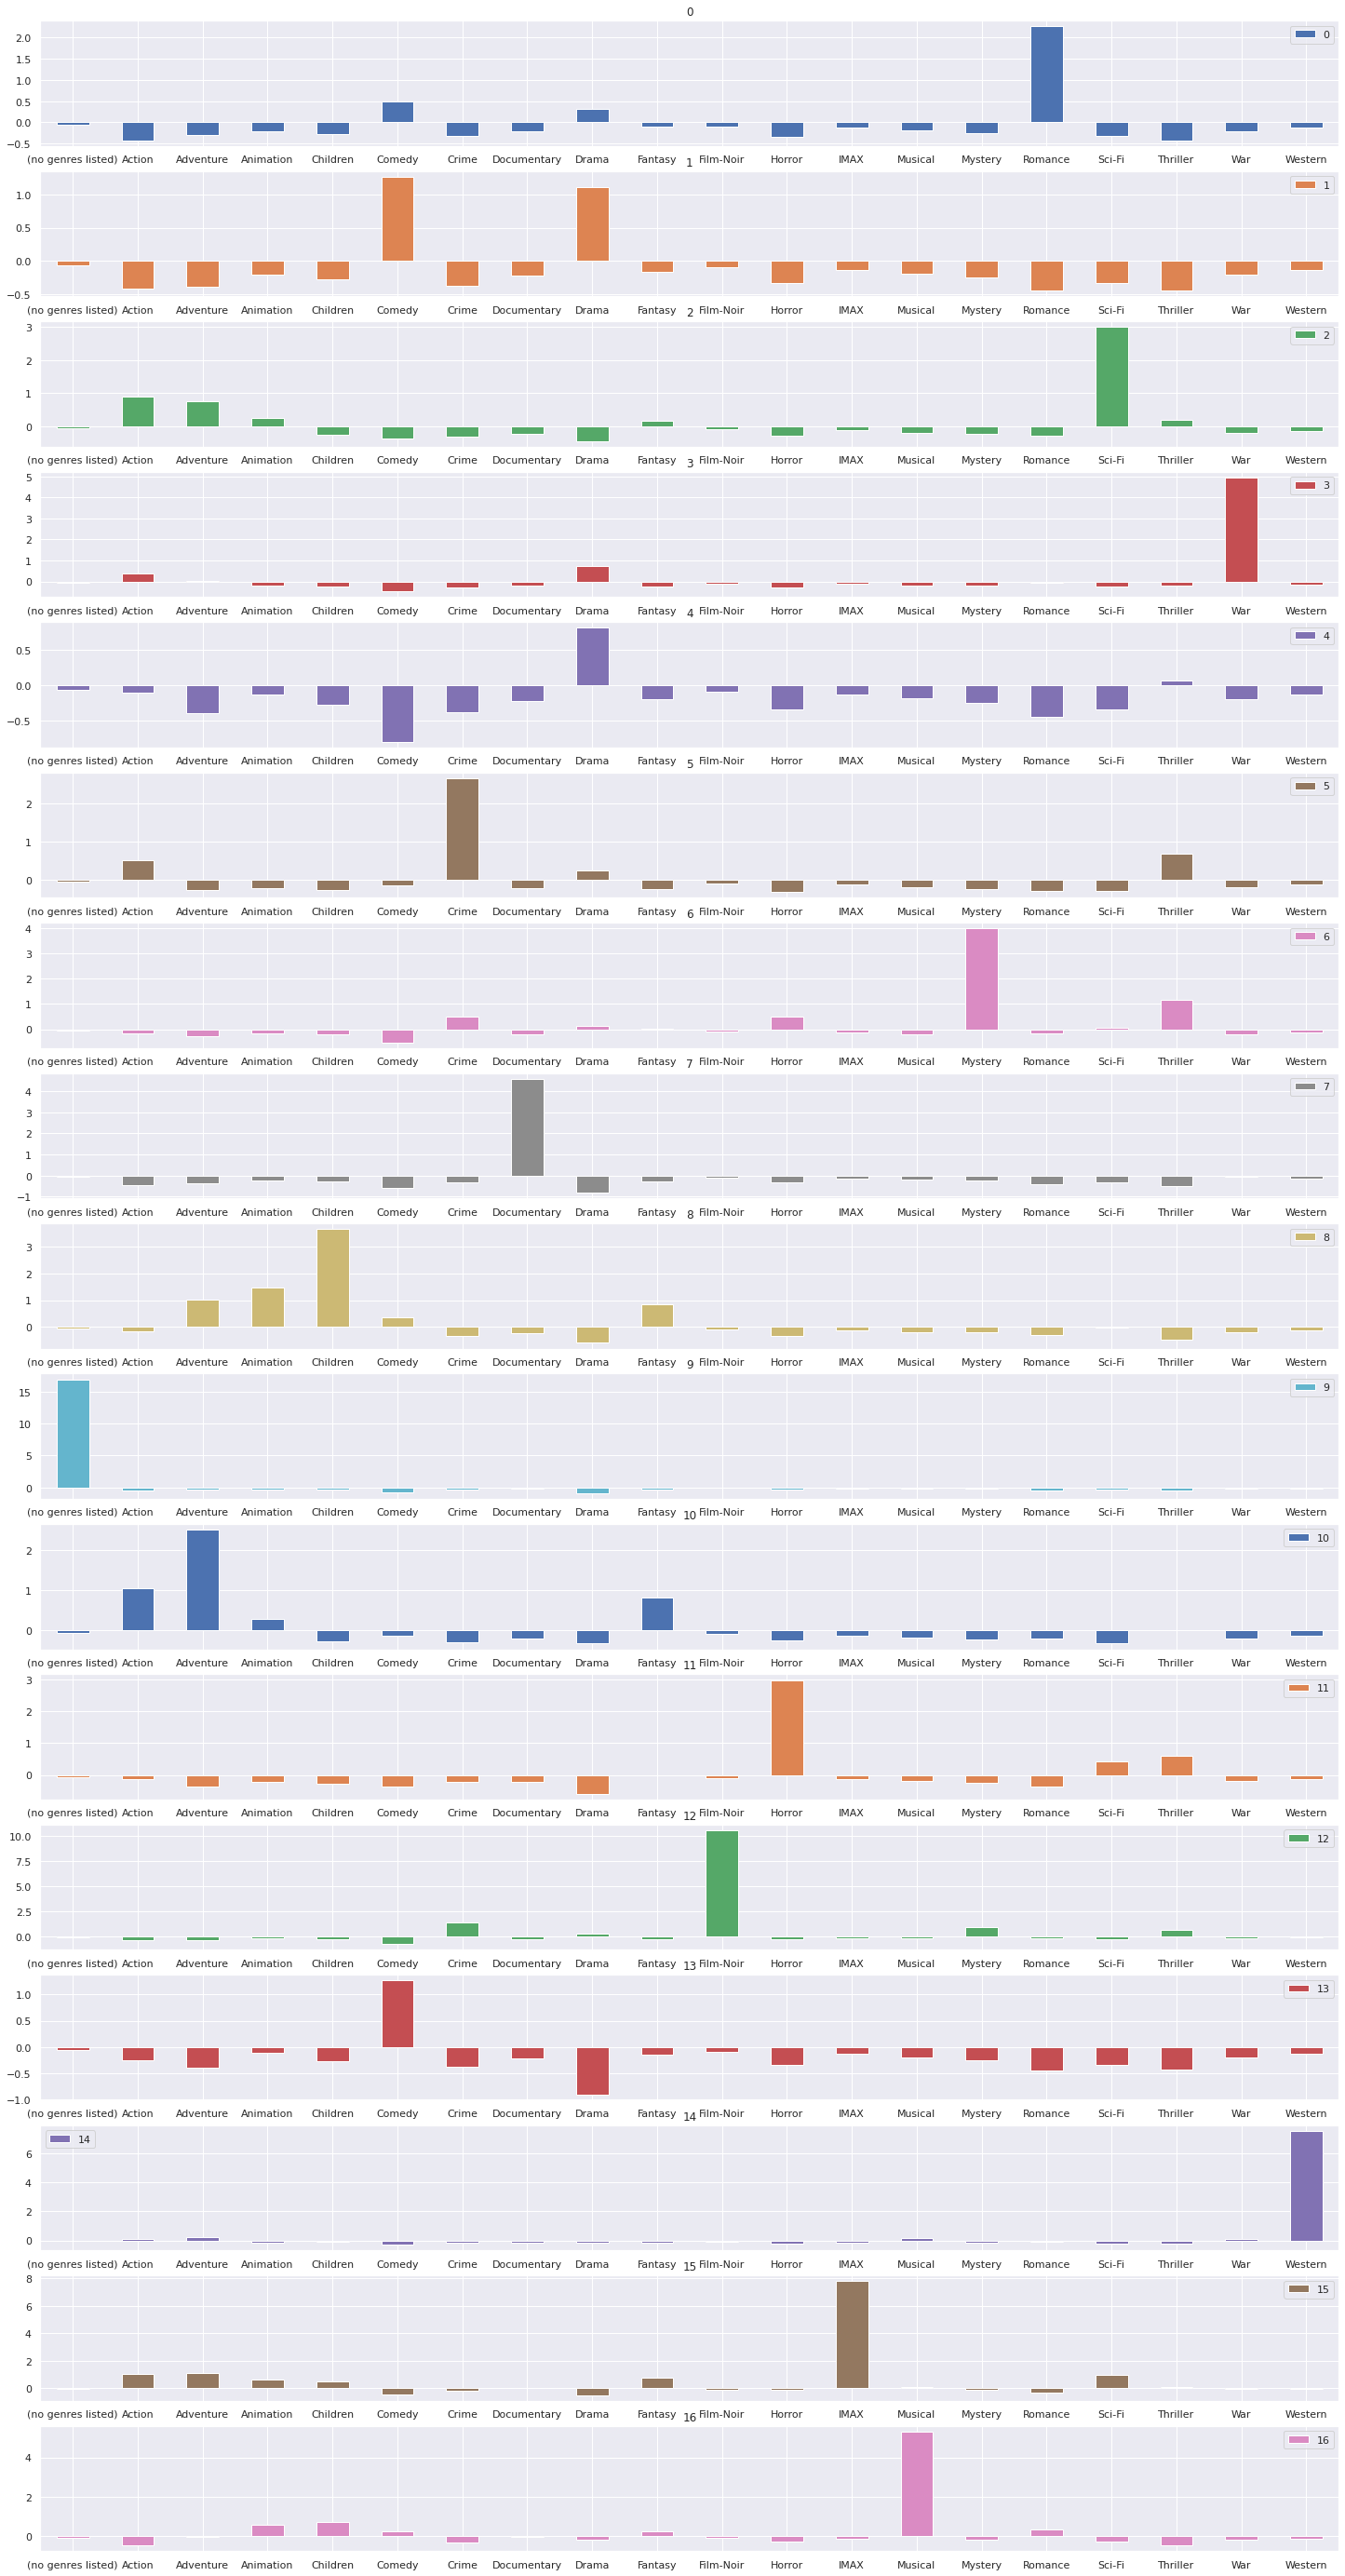

In [37]:

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [38]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1138,1489,Cats Don't Dance (1997),Animation|Children|Musical,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5855,32620,Not on the Lips (Pas sur la bouche) (2003),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8254,104875,"History of Future Folk, The (2012)",Adventure|Comedy|Musical|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
716,935,"Band Wagon, The (1953)",Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1273,1688,Anastasia (1997),Adventure|Animation|Children|Drama|Musical,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7216,73042,Alvin and the Chipmunks: The Squeakquel (2009),Animation|Children|Comedy|Musical,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6482,52975,Hairspray (2007),Comedy|Drama|Musical,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8633,118997,Into the Woods (2014),Children|Comedy|Fantasy|Musical,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [39]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [40]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-27.952501 ,  54.243954 ],
       [  1.7916499,  43.793354 ],
       [ 20.01776  , -13.110997 ],
       ...,
       [  9.5341835,  12.400038 ],
       [-11.885159 , -59.048992 ],
       [-18.530415 ,  -6.9426913]], dtype=float32)

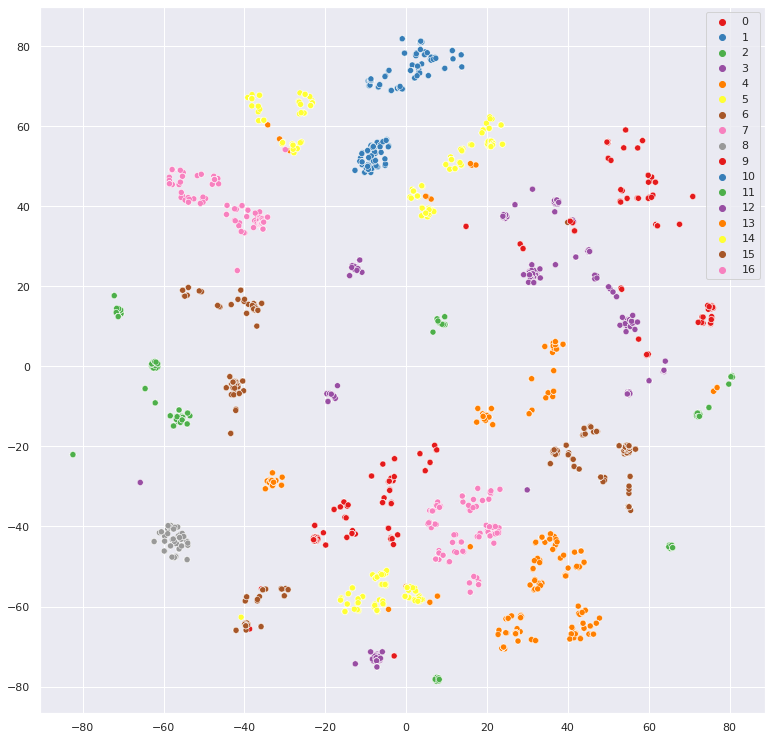

In [41]:
#agrupamento hierárquico

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos,
              palette=sns.color_palette('Set1', 17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf369ee6a0>,
      dtype=object)

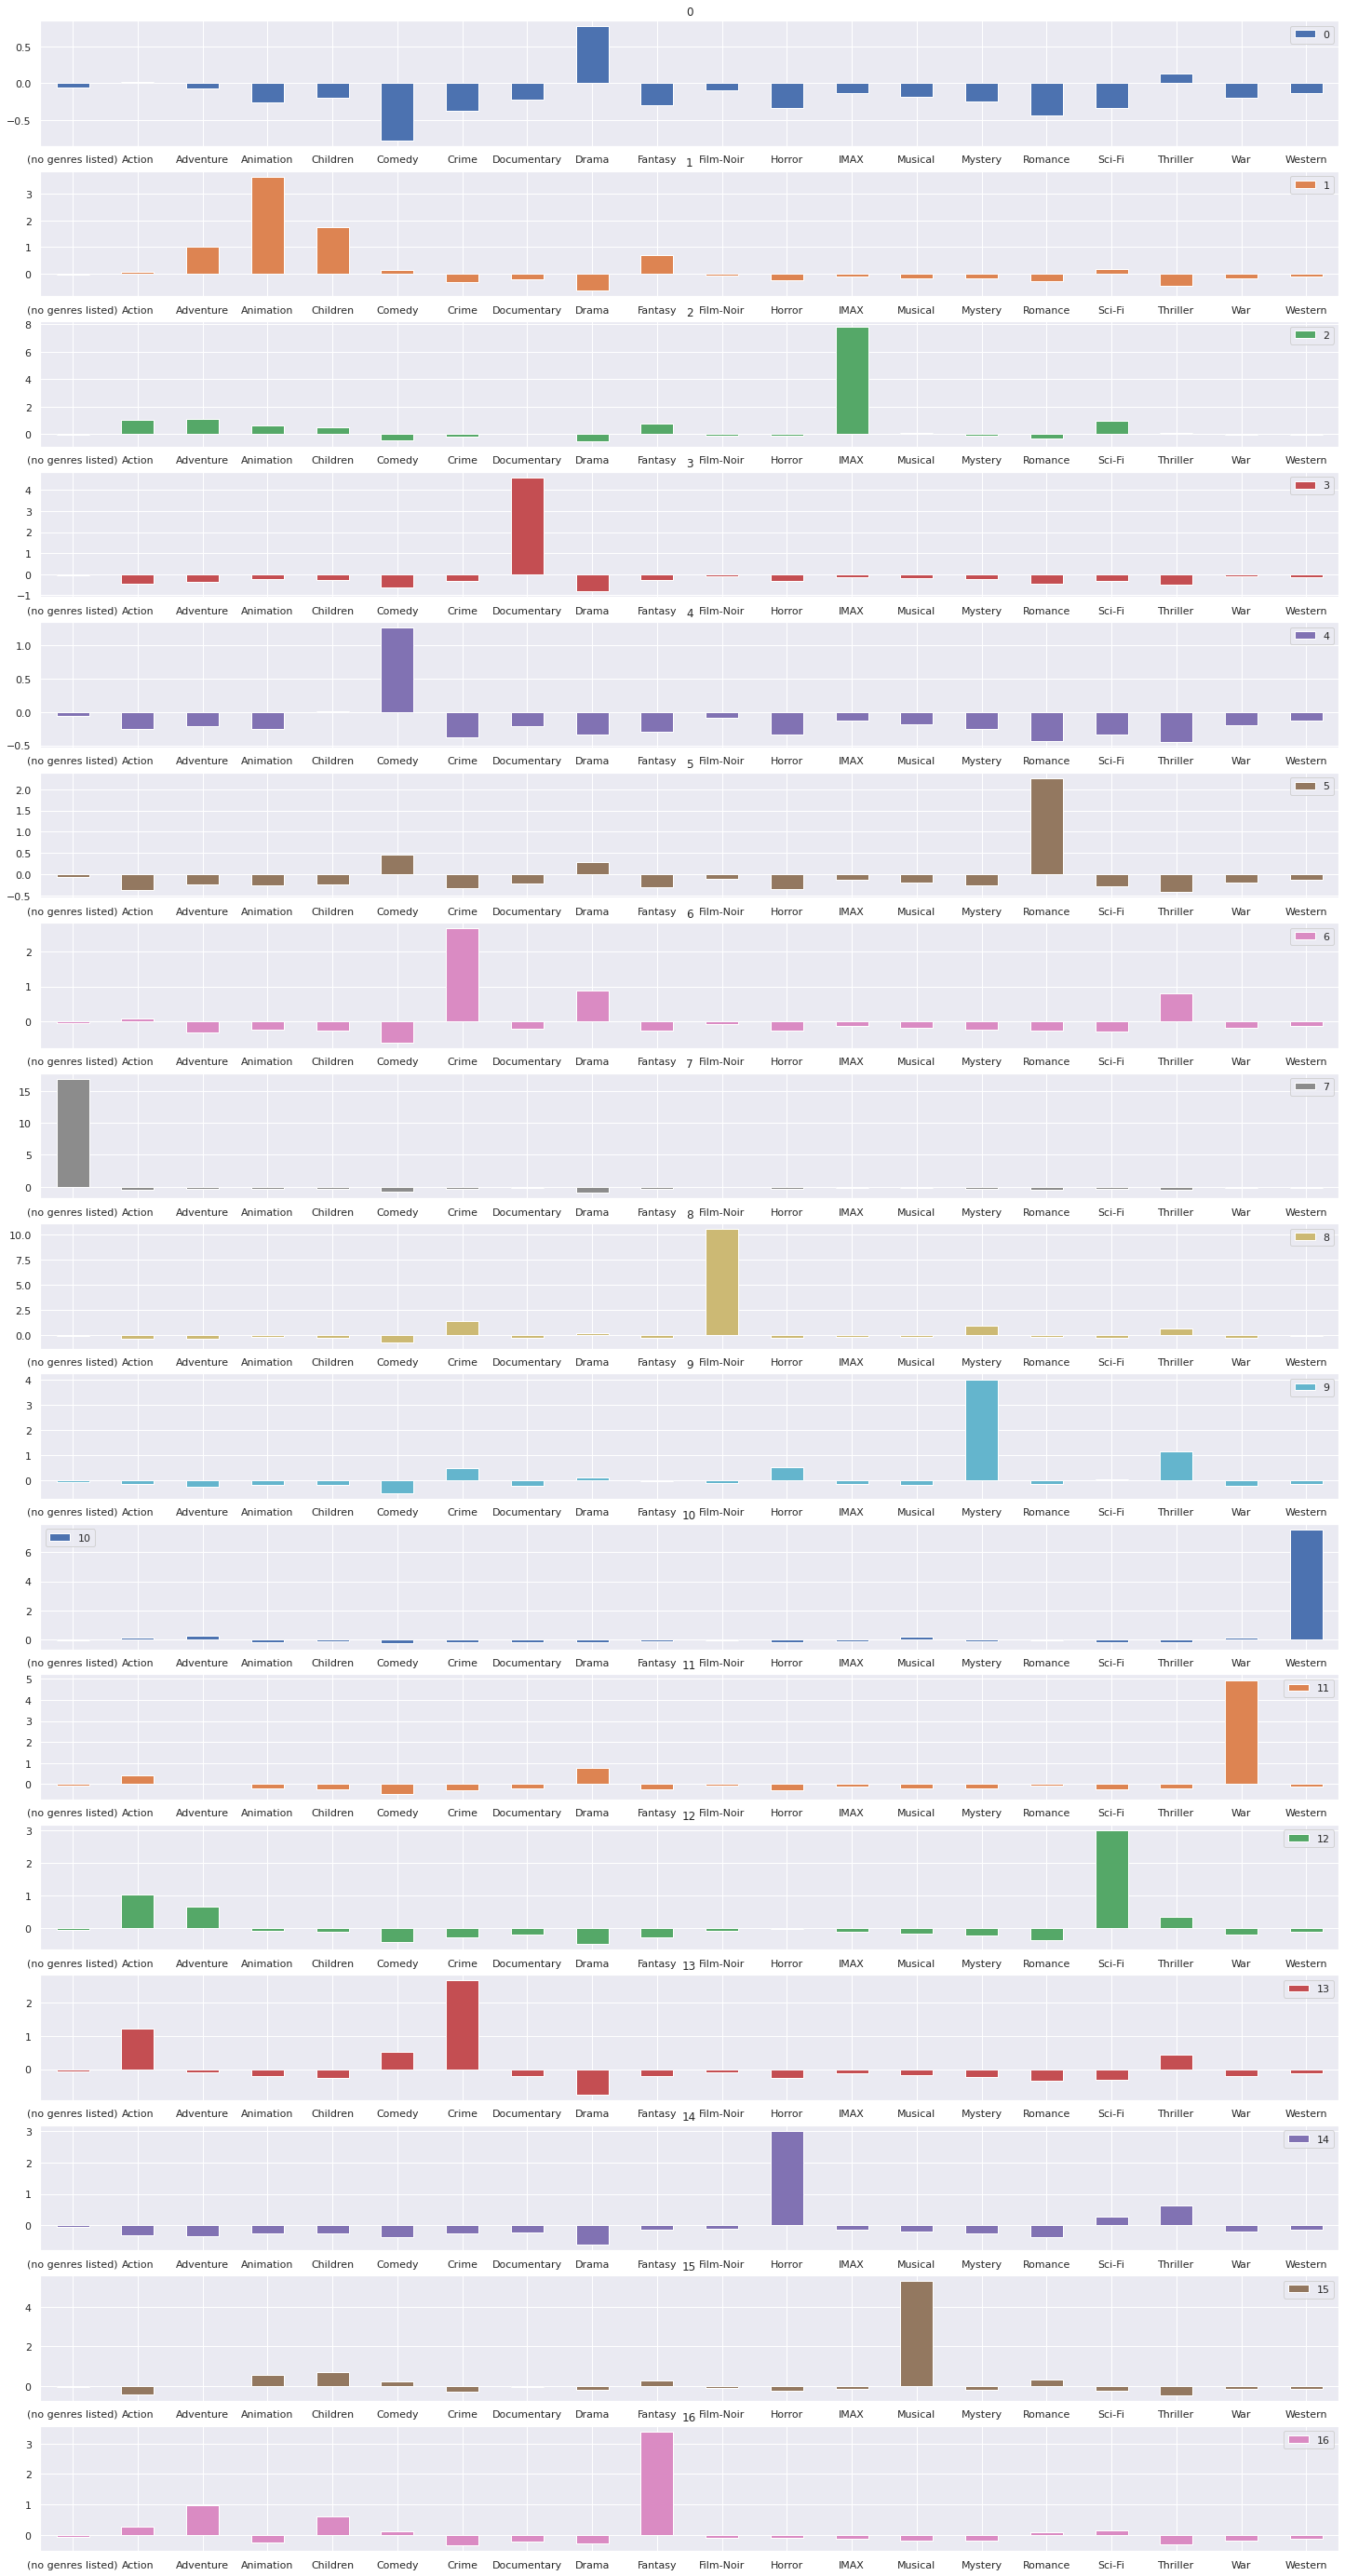

In [42]:
# Plotando um dendrograma

from scipy.cluster.hierarchy import dendrogram, linkage

#linkage calcula as "distâncias" entre os gêneros

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [43]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 6.        , 13.        ,  2.32893964,  2.        ],
       [ 0.        ,  4.        ,  2.41899066,  2.        ],
       [ 5.        , 18.        ,  2.89882526,  3.        ],
       [17.        , 19.        ,  3.13973201,  5.        ],
       [14.        , 20.        ,  3.74352808,  6.        ],
       [12.        , 21.        ,  3.80601097,  7.        ],
       [16.        , 22.        ,  4.1826715 ,  8.        ],
       [ 9.        , 23.        ,  4.62815535,  9.        ],
       [ 1.        , 24.        ,  4.74185014, 10.        ],
       [ 3.        , 25.        ,  5.14213938, 11.        ],
       [11.        , 26.        ,  5.20441595, 12.        ],
       [15.        , 27.        ,  5.78412807, 13.        ],
       [10.        , 28.        ,  7.82228657, 14.        ],
       [ 2.        , 29.        ,  8.32539977, 15.        ],
       [ 8.        , 30.        , 10.79226473, 16.        ],
       [ 7.        , 31.        , 17.06122936, 17.        ]])

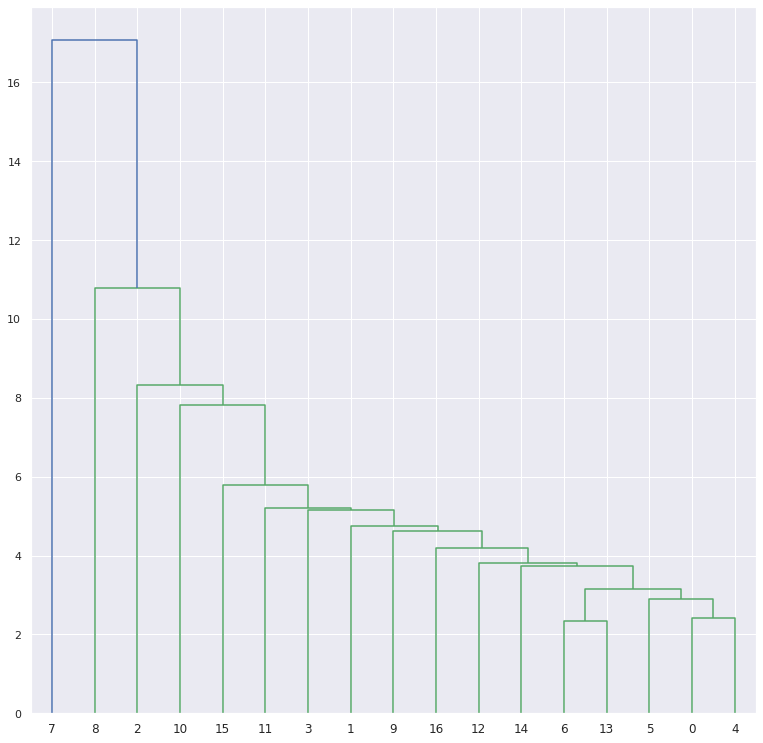

In [44]:
dendrograma = dendrogram(matriz_de_distancia)